491
a= 0.0018053374978137526 b= 0.1118653615077232 c= 14.977551020417861
cost：1
the line you want curve:
y=0.0x*x+0.112x+14.977551020417861


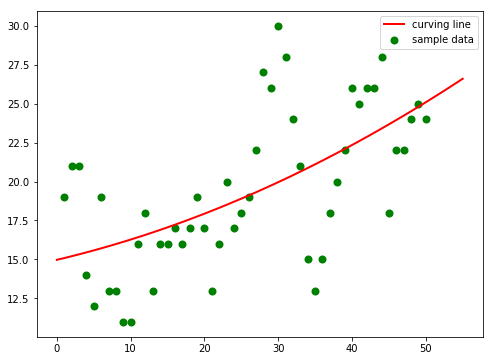

In [43]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import requests
import pymysql
from lxml import etree

 
year =2013
month = 5
day = 5
db = pymysql.connect("localhost","root","xxxx","forecast",use_unicode=True, charset="utf8")
cursor = db.cursor()
max = []
date = []
sql1 = """select cno from shanghai where cdate='{}年{}月{}日'""".format(year,month,day)

try:
       # 执行sql语句
    cursor.execute(sql1)
    x = cursor.fetchone()[0]
    db.commit()
except:
       # 如果发生错误则回滚
    db.rollback()
    
    # 关闭数据库连接

print(x)
z=1
for i in range (x-50,x):
    sql2 = """select cmax from shanghai where cno={}""".format(i)
    try:
        cursor.execute(sql2)
        m = cursor.fetchone()[0]
        max.append(m)
        date.append(z)
        z=z+1
    except:
        db.rollback()

Xi=np.array(date)
Yi=np.array(max)
##需要拟合的函数func :指定函数的形状
def func(p,x):
    a,b,c=p
    return a*x*x+b*x+c

    ##偏差函数：x,y都是列表:这里的x,y更上面的Xi,Yi中是一一对应的
def error(p,x,y):
    return func(p,x)-y

'''
    主要部分：附带部分说明
    1.leastsq函数的返回值tuple，第一个元素是求解结果，第二个是求解的代价值(个人理解)
    2.官网的原话（第二个值）：Value of the cost function at the solution
    3.实例：Para=>(array([ 0.61349535,  1.79409255]), 3)
    4.返回值元组中第一个值的数量跟需要求解的参数的数量一致
'''

#k,b的初始值，可以任意设定,经过几次试验，发现p0的值会影响cost的值：Para[1]
p0=[10,10,10]

#把error函数中除了p0以外的参数打包到args中(使用要求)
Para=leastsq(error,p0,args=(Xi,Yi))

#读取结果
a,b,c=Para[0]
print("a=",a,"b=",b,"c=",c)
print("cost："+str(Para[1]))
print("the line you want curve:")
print("y="+str(round(a,2))+"x*x+"+str(round(b,3))+"x+"+str(c))

'''
   绘图，看拟合效果.
   matplotlib默认不支持中文，label设置中文的话需要另行设置
   如果报错，改成英文就可以
'''

#画样本点
plt.figure(figsize=(8,6)) ##指定图像比例： 8：6
plt.scatter(Xi,Yi,color="green",label="sample data",linewidth=2) 

#画拟合直线
x=np.linspace(0,55,100) ##在0-15直接画100个连续点
y=a*x*x+b*x+c ##函数式
plt.plot(x,y,color="red",label="curving line",linewidth=2) 
plt.legend() #绘制图例
plt.show()

真实参数: [0.002667605827967647, 0.11989447901412754, 14.132551182112323]
拟合参数: [3.52987416e-03 1.27923597e-01 1.32875513e+01]


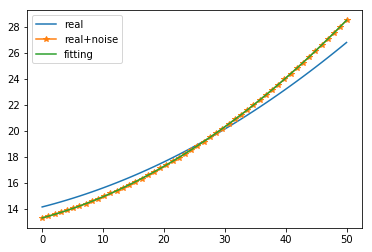

In [52]:

import numpy as np  
from scipy.optimize import leastsq  
import pylab as pl  

def func(x,p):  
    a,b,c = p  
    return a*x*x+b*x+c

def residuals(p,y,x):  
    return y-func(x,p)  

x = np.linspace(0,50)  
a,b,c =0.002667605827967647,0.11989447901412754,14.132551182112323  #真实数据参数  
y0 = func(x,[a,b,c])

y1 = 2*y0-0.0018053374978137526*x*x-0.1118653615077232*x-14.977551020417861
   #加入噪声序列  
p0 = [0.02,0.1,14]  
plsq = leastsq(residuals,p0,args = (y1,x))  
print("真实参数:",[a,b,c])  
print("拟合参数:",plsq[0]) #试验数据拟合后的参数  
pl.plot(x,y0,'-',label = "real")  
pl.plot(x,y1,'*-',label = "real+noise")  
pl.plot(x,func(x,plsq[0]),label = "fitting")  
pl.legend()  
pl.show()  

In [41]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import requests
import pymysql
from lxml import etree
year = input("year:")
month =5
day = 4

def number(year,month,day):
    db = pymysql.connect("localhost","root","9299wayy","forecast",use_unicode=True, charset="utf8")
    cursor = db.cursor()
    max = []
    date = []
    sql1 = """select cno from shanghai where cdate='{}年{}月{}日'""".format(year,month,day)
    print(year,month,day)
    try:
       # 执行sql语句
        cursor.execute(sql1)
        x = cursor.fetchone()[0]
        db.commit()
    except:
       # 如果发生错误则回滚
        db.rollback()
    
    # 关闭数据库连接
    z=1
    for i in range (x-50,x):
        sql2 = """select cmax from shanghai where cno={}""".format(i)
        try:
            cursor.execute(sql2)
            m = cursor.fetchone()[0]
            max.append(m)
            date.append(z)
            z=z+1
        except:
            db.rollback()
    Xi=np.array(date)
    Yi=np.array(max)
    
    return Xi,Yi
print(Xi,Yi,year)

year:2015
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50] [17 15 13  9  9 14 18 10 15 18 18 23 23 23 18 18 16 15 17 18 15 18 15 16
 17 17 16 17 21 21 23 21 19 20 20 21 27 26 24 22 24 27 27 22 24 21 22 27
 26 31] 2015


please input month：5
please input day：6
1588
a= 11.5794540518565 b= 0.005484417085671335 c= 12.788470989321217 d= 21.174884084629387
cost：1
the line you want curve:
y=11.58sin(0.005*3.14*x+12.788)+21.174884084629387
a1= -11.608842685628979 b1= 0.005482430326166722 c1= 15.86533532203346 d1= 14.822203251901422
the line you want curve:
y=-11.61sin(0.005*3.14*x+15.865)+14.822203251901422


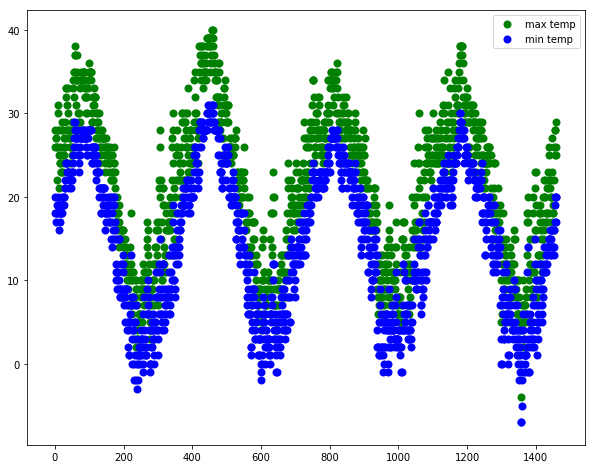

上海市2018年5月7日最高温度为25.68最低温度为16.8


In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import requests
import pymysql
from lxml import etree
import math

year = 2016
month = input("please input month：")
day = input("please input day：")
db = pymysql.connect("localhost","root","9299wayy","forecast",use_unicode=True, charset="utf8")
cursor = db.cursor()
max = []
date = []
min = []

sql1 = """select cno from shanghai where cdate='{}年{}月{}日'""".format(year,month,day)
try:
    cursor.execute(sql1)
    x = cursor.fetchone()[0]
    db.commit()
except:
    db.rollback()

print(x)
z=1
for i in range (x-1460,x):
    
    sql2 = """select cmax from shanghai where cno={}""".format(i)
    sql3 = """select cmin from shanghai where cno={}""".format(i)
    
    try:
        cursor.execute(sql2)
        m = cursor.fetchone()[0]
        max.append(m)
        cursor.execute(sql3)
        n = cursor.fetchone()[0]
        min.append(n)
        date.append(z)
        z=z+1
    except:
        db.rollback()
db.close()
Xi=np.array(date)
Yi=np.array(max)
Yi2 = np.array(min)
a=0
b=0
c=0
d=0
a1=0
a2=0
a3=0
a4=0
def func(p,x):
    a,b,c,d = p
    return a*np.sin(b*math.pi*x+c)+d

def error(p,x,y):
    return func(p,x)-y

def func1(p1,x1):
    a1,b1,c1,d1 = p1
    return a1*np.sin(b1*math.pi*x1+c1)+d1

def error1(p1,x1,y1):
    return func1(p1,x1)-y1

p0=[1,2/365,10,5]
Para=leastsq(error,p0,args=(Xi,Yi))
a,b,c,d = Para[0]
print("a=",a,"b=",b,"c=",c,"d=",d)
print("cost："+str(Para[1]))
print("the line you want curve:")
print("y="+str(round(a,2))+"sin("+str(round(b,3))+"*3.14*x+"+str(round(c,3))+")+"+str(d))
Para1=leastsq(error1,p0,args=(Xi,Yi2))
a1,b1,c1,d1 = Para1[0]
print("a1=",a1,"b1=",b1,"c1=",c1,"d1=",d1)
print("the line you want curve:")
print("y="+str(round(a1,2))+"sin("+str(round(b1,3))+"*3.14*x+"+str(round(c1,3))+")+"+str(d1))

plt.figure(figsize=(10,8))
plt.scatter(Xi,Yi,color="green",label="max temp",linewidth=2)
plt.scatter(Xi,Yi2,color="blue",label="min temp",linewidth=2)

x= np.linspace(0,1460)
y=a*np.sin(b*math.pi*x+c)+d 
x1= np.linspace(0,1460) 
y1=a1*np.sin(b1*math.pi*x1+c1)+d1 
#plt.plot(x1,y1,color="yellow",label="mintemp line",linewidth=2)  
#plt.plot(x,y,color="red",label="maxtemp line",linewidth=2)  
plt.legend() 
plt.show()

high=a*np.sin(b*math.pi*1469+c)+d
low=a1*np.sin(b1*math.pi*1460+c1)+d1

url1 = 'http://lishi.tianqi.com/shanghai/index.html'
dloc = requests.get(url1).text
m = etree.HTML(dloc)
title = m.xpath('//*[@id="mo_shenghuo_header"]/h1/text()')
name = title[0]
n = name.index("历")
location = name[:n]
day1 = int(day)+1
try:
    print("{}市2018年{}月{}日最高温度为{}最低温度为{}".format(location,month,day1,round(high,2),round(low,2)))
except:
    print("某值为空")

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.optimize import leastsq
import requests
import pymysql
from lxml import etree
import math

year = 2016
month = input("please input month：")
day = input("please input day：")
db = pymysql.connect("localhost","root","9299wayy","forecast",use_unicode=True, charset="utf8")
cursor = db.cursor()
max = []
date = []
min = []

sql1 = """select cno from shanghai where cdate='{}年{}月{}日'""".format(year,month,day)
try:
    cursor.execute(sql1)
    x = cursor.fetchone()[0]
    db.commit()
except:
    db.rollback()

print(x)
z=1
for i in range (x-1460,x):
    
    sql2 = """select cmax from shanghai where cno={}""".format(i)
    sql3 = """select cmin from shanghai where cno={}""".format(i)
    
    try:
        cursor.execute(sql2)
        m = cursor.fetchone()[0]
        max.append(m)
        cursor.execute(sql3)
        n = cursor.fetchone()[0]
        min.append(n)
        date.append(z)
        z=z+1
    except:
        db.rollback()
db.close()
Xi=np.array(date)
Yi=np.array(max)
Yi2 = np.array(min)


plt.figure(figsize=(10,8))
plt.scatter(Xi,Yi,color="green",label="max temp",linewidth=2)
plt.scatter(Xi,Yi2,color="blue",label="min temp",linewidth=2)


plt.legend() 
plt.show()


please input month：5
please input day：6
1588
